In [1]:
import pandas as pd
from gqlalchemy import Memgraph
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt


In [2]:
memgraph = Memgraph(host="localhost", port=7687)

In [3]:
sims = ["Calcium", "NoNetwork", "Disable", "Stimulus"]
results = []
timestep = 0
for sim in sims:
    query = f"MATCH (n:Neuron:{sim})-[e]->() RETURN n.id as id, sum(e.w{timestep}) as {sim.lower()}_deg"
    result = memgraph.execute_and_fetch(query)
    results.append(result)

neurons = []
for c, nn, d, s in zip(*results):
    neurons.append(c | nn | d | s)
print(neurons)
df = pd.DataFrame(neurons)
df



[{'id': 1441, 'calcium_deg': 13, 'nonetwork_deg': 0, 'disable_deg': 17, 'stimulus_deg': 11}, {'id': 49554, 'calcium_deg': 14, 'nonetwork_deg': 0, 'disable_deg': 20, 'stimulus_deg': 9}, {'id': 47831, 'calcium_deg': 12, 'nonetwork_deg': 0, 'disable_deg': 15, 'stimulus_deg': 17}, {'id': 46382, 'calcium_deg': 16, 'nonetwork_deg': 0, 'disable_deg': 15, 'stimulus_deg': 20}, {'id': 46315, 'calcium_deg': 14, 'nonetwork_deg': 0, 'disable_deg': 14, 'stimulus_deg': 13}, {'id': 44772, 'calcium_deg': 15, 'nonetwork_deg': 0, 'disable_deg': 17, 'stimulus_deg': 15}, {'id': 40347, 'calcium_deg': 14, 'nonetwork_deg': 0, 'disable_deg': 11, 'stimulus_deg': 15}, {'id': 39030, 'calcium_deg': 13, 'nonetwork_deg': 0, 'disable_deg': 12, 'stimulus_deg': 17}, {'id': 34463, 'calcium_deg': 18, 'nonetwork_deg': 0, 'disable_deg': 12, 'stimulus_deg': 18}, {'id': 33632, 'calcium_deg': 14, 'nonetwork_deg': 0, 'disable_deg': 11, 'stimulus_deg': 11}, {'id': 35953, 'calcium_deg': 15, 'nonetwork_deg': 0, 'disable_deg': 18,

id  calcium_deg  nonetwork_deg  disable_deg  stimulus_deg
0       1441           13              0           17            11
1      49554           14              0           20             9
2      47831           12              0           15            17
3      46382           16              0           15            20
4      46315           14              0           14            13
...      ...          ...            ...          ...           ...
49995  44202           18              0           11            13
49996  44327           13              0           16            14
49997  44291           13              0           16            15
49998  32840           16              0           12            14
49999  44741           14              0           15            13

[50000 rows x 5 columns]

0
1
2
3


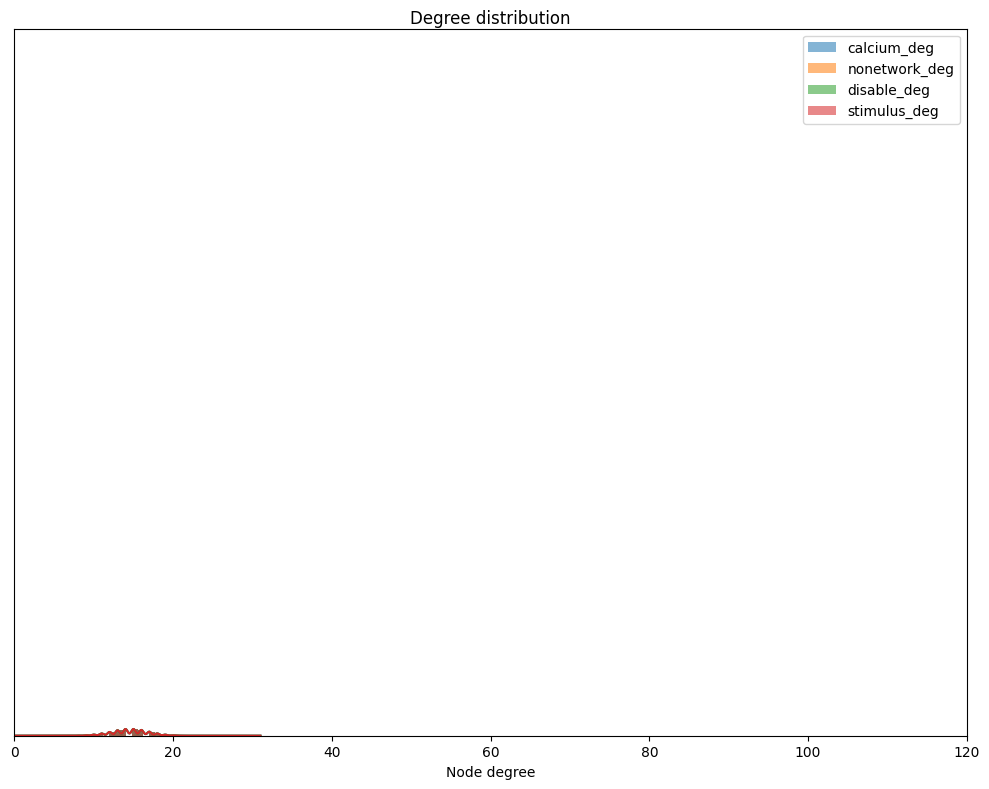

In [105]:
fig, ax = plt.subplots(figsize = (10,8))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fields = ["calcium", "nonetwork", "disable", "stimulus"]
for i, (sim, color) in enumerate(zip(fields, colors)):
    print(i)
    field = f"{sim}_deg"
    df[field].plot(kind='hist', bins=25, density=True, alpha = 0.55, color=color, ax=ax)
    try:
        df[field].plot(kind="kde", ax=ax, color=color, label='_nolegend_')
    except np.linalg.LinAlgError:
        pass

ax.set_ylabel("")
ax.set_yticks([])
ax.set_title(f"Degree distribution", size = 12, pad=4)
ax.set_xlabel("Node degree")
ax.set_xlim(0, 120)
plt.legend()
fig.tight_layout()
plt.show()

In [13]:
dfs = []
for i in tqdm(range(0, 101)):
    results = []
    for sim in sims:
        query = f"MATCH (n:Neuron:{sim})-[e]->() RETURN n.id as id, sum(e.w{timestep}) as {sim.lower()}_deg"
        result = memgraph.execute_and_fetch(query)
        results.append(result)

    neurons = []
    for c, nn, d, s in zip(*results):
        neurons.append(c | nn | d | s)
    df = pd.DataFrame(neurons)
    dfs.append(df)

  7%|▋         | 7/101 [01:26<19:22, 12.37s/it]


KeyboardInterrupt: 

In [34]:
sims = ["Calcium", "NoNetwork", "Disable", "Stimulus"]
for timestep in tqdm(range(0, 101)):
    results = []
    for sim in sims:
        query = f"MATCH (n:Neuron:{sim})-[e]->() RETURN n.id as id, sum(e.w{timestep}) as {sim.lower()}_deg"
        result = memgraph.execute_and_fetch(query)
        results.append(result)

    neurons = []
    for c, nn, d, s in zip(*results):
        neurons.append(c | nn | d | s)
    df = pd.DataFrame(neurons)
    del neurons
    fig, axs = plt.subplots(2, 2, figsize = (10,8))
    axs = axs.flatten()
    fields = ["calcium", "nonetwork", "disable", "stimulus"]
    ylims = [0.17, 0.5, 0.21, 0.23]
    for i, ax in enumerate(axs):
        field = f"{fields[i]}_deg"
        bins = [i for i in range(0, 40, 1)]
        df[field].plot(kind='hist', bins=bins, density=True, alpha = 0.65, ax=ax)
        # try:
        #     df[field].plot(kind="kde", ax=ax,  bw_method=0.3)
        # except np.linalg.LinAlgError:
        #     pass
        ax.set_ylabel("")
        ax.set_title(f"Degree distribution {fields[i].capitalize()}", size = 12, pad=4)
        ax.set_xlabel("Node degree")
        ax.set_xlim(0, 40)
        ax.set_ylim(0, ylims[i])
        ax.set_yticks([])
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    filename = "z" * (timestep // len(alphabet)) + alphabet[timestep % 26] + str(timestep) + ".png"
    # fig.subplots_adjust(hspace=0.7, top=0.90)
    fig.text(s=f"Iteration {timestep: <3}", x=0.01, y=1.03, fontdict={"fontsize": 15})
    fig.tight_layout()
    # plt.show()
    plt.savefig("degree_distribution_images/" + filename, bbox_inches="tight")
    plt.close()
    del df

100%|██████████| 101/101 [18:58<00:00, 11.27s/it]


In [93]:
for i in range(25):
    print(i, df["calcium_deg"].loc[df["calcium_deg"] == i].shape)

0 (15069,)
1 (2409,)
2 (1973,)
3 (1739,)
4 (1512,)
5 (1339,)
6 (1298,)
7 (1233,)
8 (1264,)
9 (1181,)
10 (1208,)
11 (1201,)
12 (1162,)
13 (1191,)
14 (1205,)
15 (1103,)
16 (1142,)
17 (1126,)
18 (1124,)
19 (1045,)
20 (1063,)
21 (1030,)
22 (941,)
23 (879,)
24 (808,)
